In [8]:
!pip install git+https://github.com/tweepy/tweepy.git
!pip install textblob
!pip install vaderSentiment
!pip install tqdm
!pip install transformers
!pip install ipywidgets
!pip install jupyter
!pip install jupyterlab_widgets
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scipy
!pip install wordcloud
!pip install scikit-learn
nltk.download('punkt')

  Cloning https://github.com/tweepy/tweepy.git to c:\users\tonch\appdata\local\temp\pip-req-build-3uttx6po
  Resolved https://github.com/tweepy/tweepy.git to commit e854138dcecc223fac1038704ec0d9266037217b
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/tweepy/tweepy.git 'C:\Users\tonch\AppData\Local\Temp\pip-req-build-3uttx6po'


     ---------------------------------------- 8.3/8.3 MB 1.3 MB/s eta 0:00:00


In [45]:
!jupyter nbextension enable --py widgetsnbextension --sys-prefix

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
filename='TwitterSentimentAnalysis.csv'
clean_filename='PolarityDf.csv'
words_filename='WordsDf.csv'

In [69]:
import tweepy

bearer_token = 'AAAAAAAAAAAAAAAAAAAAAKc6fAEAAAAAqOiq7%2BH5XPp2x7t1jdhgSq8FLx8%3DtQjUwvSzRe4klrT9oVOGhctQl3aBhoAc1bio73I5ra1R1NA45s'
client = tweepy.Client(bearer_token)

In [70]:
query = '("AI" OR "Artificial Intelligence" OR "ChatGPT" OR "ChatGPT-3" OR "Chat GPT" OR "ChatGPT 3") -sale lang:en -(is:retweet OR is:reply) -(has:hashtags OR has:mentions OR has:links)'
response = tweepy.Paginator(client.search_recent_tweets, query=query, tweet_fields=['created_at'], max_results=100).flatten(limit=7000)

In [95]:
def create_df(response):
    twitter_data = []

    for tweet in response:
        twitter_data.append([tweet.text, tweet.created_at])

    columns = ['Text', 'Date']

    df = pd.DataFrame(twitter_data, columns=columns)
    
    return df

In [187]:
def clean_text(df):
    i=0
    for text in df['Text']:
        text = re.sub(r'\n\n', ' ', text)
        text = re.sub(r'\n','', text)
        df['Text'][i] = text
        i+= 1
        
    return df

In [97]:
def storage_new_data(df):
    actual_df = pd.read_csv(filename)
    new_df = df.copy()
    
    all_data = pd.concat([actual_df, new_df], ignore_index=True)
    all_data.drop_duplicates(subset=['Text'], ignore_index= True, inplace=True)
    all_data.to_csv(filename, index=False)

In [91]:
all_data.to_csv(filename, index=False)

In [182]:
def storage_clean_data(df):
    df.to_csv(clean_filename, index=False)

In [183]:
def storage_words(df):
    df.to_csv(words_filename, index=False)

In [98]:
df = create_df(response)
df = clean_text(df)
storage_new_data(df)

In [99]:
all_data = pd.read_csv(filename)

In [100]:
all_data

,Text,Date
0,i don't think the creator actually knew how to...,2023-01-19 17:59:24+00:00
1,chatgpt!?,2023-01-19 17:59:18+00:00
2,That was never a pen lol ai man,2023-01-19 17:59:18+00:00
3,these ai history things make me laugh so fucki...,2023-01-19 17:59:10+00:00
4,Microsoft used to be best employer and a dream...,2023-01-19 17:58:30+00:00
...,...,...
15036,It is great to see the crypto community so ent...,2023-02-02 05:05:03+00:00
15037,Let's share stories that makes no sense in the...,2023-02-02 05:05:02+00:00
15038,AI EP dropping next week,2023-02-02 05:05:01+00:00
15039,"AI generated porn, huh?? Hold my beer.",2023-02-02 05:04:58+00:00


In [124]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [ ]:
vader_model = SentimentIntensityAnalyzer()

In [244]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tonch\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [ ]:
# Using VADER model to get text polarity scores

In [420]:
print(vader_model.polarity_scores('I am so happy!'))

print(vader_model.polarity_scores('This is the worst thing ever.'))

print(vader_model.polarity_scores(all_data['Text'][4]))

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [425]:
all_data['Text'][4]

"Microsoft used to be best employer and a dream job for many. They can afford chatgpt worth 10 billion but they can't afford 10k employees.Moral of the story: Stop treating your job as everything and start treating it as a business."

In [517]:
vader_res={}
n = 0
for i, row in tqdm(all_data.iterrows(), total=len(all_data)):
    text = row['Text']
    vader_res[n] = vader_model.polarity_scores(text)
    n += 1

  0%|          | 0/8244 [00:00<?, ?it/s]

In [518]:
vader_res = pd.DataFrame(vader_res).T
vaders_data = all_data.join(vader_res, how='right')

In [519]:
vaders_data

,Text,Date,neg,neu,pos,compound
0,i don't think the creator actually knew how to...,2023-01-19 17:59:24+00:00,0.000,1.000,0.000,0.0000
1,chatgpt!?,2023-01-19 17:59:18+00:00,0.000,1.000,0.000,0.0000
2,That was never a pen lol ai man,2023-01-19 17:59:18+00:00,0.280,0.720,0.000,-0.3252
3,these ai history things make me laugh so fucki...,2023-01-19 17:59:10+00:00,0.000,0.714,0.286,0.5574
4,Microsoft used to be best employer and a dream...,2023-01-19 17:58:30+00:00,0.065,0.807,0.128,0.1901
...,...,...,...,...,...,...
8239,"My bad, my AI actung up aha",2023-02-01 01:33:13+00:00,0.368,0.632,0.000,-0.5423
8240,kind of problematic that ai image generators w...,2023-02-01 01:33:07+00:00,0.093,0.907,0.000,-0.3145
8241,When you don't have someone to talk to- *talks...,2023-02-01 01:33:06+00:00,0.171,0.829,0.000,-0.4767
8242,I was using character AI and was amazed by it ...,2023-02-01 01:32:55+00:00,0.000,0.774,0.226,0.9294


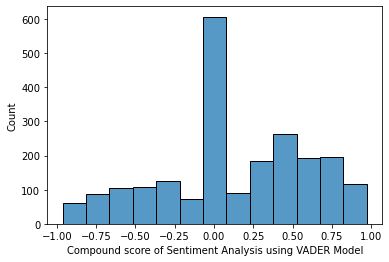

In [460]:
ax = sns.histplot(data=vaders_data, x='compound', bins=13)
ax.set_xlabel('Compound score of Sentiment Analysis using VADER Model')
plt.show()

In [522]:
vaders_data[vaders_data['compound'] < -0.5].sort_values(by='compound', ascending=True)

,Text,Date,neg,neu,pos,compound
6637,sigh ive had such a shit day and the atrioc sh...,2023-02-01 05:09:29+00:00,0.471,0.487,0.042,-0.9893
5950,i cant wait until ai shit gets sanctioned up t...,2023-02-01 06:47:59+00:00,0.450,0.508,0.042,-0.9839
7434,I never thought of myself as anything remotely...,2023-02-01 03:28:49+00:00,0.490,0.366,0.144,-0.9828
5678,Okay yeah I don’t care if I get hate for this ...,2023-02-01 07:33:56+00:00,0.382,0.550,0.067,-0.9818
4768,The amount of people not caring and/or not und...,2023-02-01 10:33:45+00:00,0.468,0.532,0.000,-0.9804
...,...,...,...,...,...,...
4361,What I've seen till now is that AI art can qui...,2023-02-01 11:59:45+00:00,0.140,0.860,0.000,-0.5023
924,Part of me wants to make a DA for my NSFW stuf...,2023-01-19 15:36:40+00:00,0.134,0.866,0.000,-0.5023
5736,ChatGPT is going to be revolutionary with 4.0....,2023-02-01 07:25:36+00:00,0.095,0.905,0.000,-0.5023
1678,I'm gonna be very disappointed if someone isn'...,2023-01-19 18:44:38+00:00,0.138,0.815,0.047,-0.5015


In [122]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [134]:
roberta_model = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(roberta_model)
roberta_model = AutoModelForSequenceClassification.from_pretrained(roberta_model)

In [135]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = roberta_model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }
    return scores_dict

In [125]:
res = {}
n = 0

for i, row in tqdm(all_data.iterrows(), total=len(all_data)):
    text = row['Text']
    #vader_res = vader_model.polarity_scores(text)
    #vader_result_rename = {}
    
    #for key, value in vader_res.items():
        #vader_result_rename[f'vader_{key}']=value
        
    roberta_result = polarity_scores_roberta(text)
    #both = {**vader_result_rename, **roberta_result}
    #res[n] = both
    res[n] = roberta_result
    n += 1

  0%|          | 0/14276 [00:00<?, ?it/s]

In [502]:
res

{0: {'roberta_neg': 0.7603167,
  'roberta_neu': 0.22427002,
  'roberta_pos': 0.015413247},
 1: {'roberta_neg': 0.16339153,
  'roberta_neu': 0.77557224,
  'roberta_pos': 0.061036155},
 2: {'roberta_neg': 0.15932551,
  'roberta_neu': 0.6718398,
  'roberta_pos': 0.16883476},
 3: {'roberta_neg': 0.029020103,
  'roberta_neu': 0.071892366,
  'roberta_pos': 0.89908755},
 4: {'roberta_neg': 0.3429329,
  'roberta_neu': 0.42957878,
  'roberta_pos': 0.22748826},
 5: {'roberta_neg': 0.44584724,
  'roberta_neu': 0.48056653,
  'roberta_pos': 0.07358616},
 6: {'roberta_neg': 0.8275325,
  'roberta_neu': 0.13888621,
  'roberta_pos': 0.033581275},
 7: {'roberta_neg': 0.09888345,
  'roberta_neu': 0.561166,
  'roberta_pos': 0.33995053},
 8: {'roberta_neg': 0.18854766,
  'roberta_neu': 0.759167,
  'roberta_pos': 0.05228532},
 9: {'roberta_neg': 0.1897773,
  'roberta_neu': 0.67914784,
  'roberta_pos': 0.13107485},
 10: {'roberta_neg': 0.9593025,
  'roberta_neu': 0.03660711,
  'roberta_pos': 0.004090506},
 1

In [127]:
results_df = pd.DataFrame(res).T
results_df = all_data.join(results_df, how='right') 

In [463]:
results_df

,Text,Date,roberta_neg,roberta_neu,roberta_pos
0,i don't think the creator actually knew how to...,2023-01-19 17:59:24+00:00,0.760317,0.224270,0.015413
1,chatgpt!?,2023-01-19 17:59:18+00:00,0.163392,0.775572,0.061036
2,That was never a pen lol ai man,2023-01-19 17:59:18+00:00,0.159326,0.671840,0.168835
3,these ai history things make me laugh so fucki...,2023-01-19 17:59:10+00:00,0.029020,0.071892,0.899088
4,Microsoft used to be best employer and a dream...,2023-01-19 17:58:30+00:00,0.342933,0.429579,0.227488
...,...,...,...,...,...
8239,"My bad, my AI actung up aha",2023-02-01 01:33:13+00:00,0.782643,0.195758,0.021599
8240,kind of problematic that ai image generators w...,2023-02-01 01:33:07+00:00,0.824969,0.160797,0.014235
8241,When you don't have someone to talk to- *talks...,2023-02-01 01:33:06+00:00,0.879584,0.110344,0.010071
8242,I was using character AI and was amazed by it ...,2023-02-01 01:32:55+00:00,0.011014,0.111138,0.877847


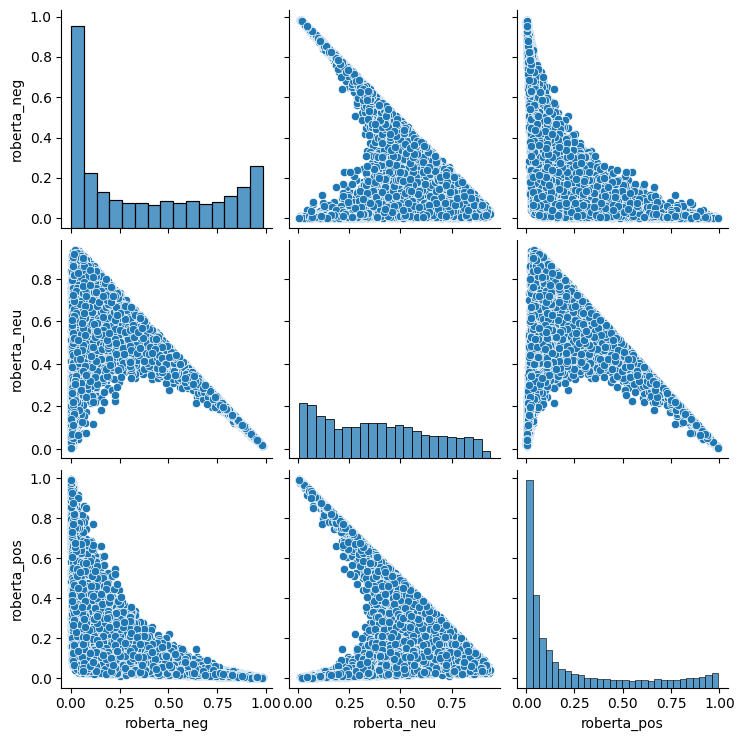

In [464]:
sns.pairplot(data=results_df, vars=results_df.columns[2:])

In [85]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

In [147]:
#Define net final result: P or N

neg_results = results_df[(results_df['roberta_neg'] > (results_df['roberta_pos'])) & (results_df['roberta_neu'] < (results_df['roberta_pos'] + results_df['roberta_neg']))]
pos_results = results_df[(results_df['roberta_pos'] > (results_df['roberta_neg'])) & (results_df['roberta_neu'] < (results_df['roberta_pos'] + results_df['roberta_neg']))]
neu_results = results_df[results_df['roberta_neu'] > (results_df['roberta_pos'] + results_df['roberta_neg'])]

In [148]:
neg_results.sort_values('roberta_neg', ascending=False)

,Text,Date,roberta_neg,roberta_neu,roberta_pos
13454,i cant，i cant fucking believe Netflix，such a b...,2023-02-02 07:26:52+00:00,0.984450,0.012993,0.002557
2298,Can ChatGPT replace property managers already ...,2023-02-01 15:59:06+00:00,0.983777,0.013780,0.002443
6637,sigh ive had such a shit day and the atrioc sh...,2023-02-01 05:09:29+00:00,0.983603,0.013486,0.002911
9227,ngl i kinda hate this ai voice shit because i'...,2023-02-02 17:55:08+00:00,0.983252,0.014513,0.002235
5711,the ai deepfake shit is so utterly horrible an...,2023-02-01 07:28:36+00:00,0.982833,0.015040,0.002126
...,...,...,...,...,...
12895,"Day by day declining economy, 3rd world, under...",2023-02-02 09:19:21+00:00,0.276004,0.468055,0.255940
11067,The satisfaction one gets by solving a coding ...,2023-02-02 14:33:43+00:00,0.269015,0.465987,0.264997
2380,Was just chatting to a friend. He did a up a p...,2023-02-01 15:50:11+00:00,0.268446,0.485677,0.245877
5719,They can beat us at chess and there is exactly...,2023-02-01 07:27:53+00:00,0.267918,0.480764,0.251318


In [149]:
pos_results.sort_values('roberta_pos', ascending=False)

,Text,Date,roberta_neg,roberta_neu,roberta_pos
12314,"So, my Birthday is on Friday! And since ai won...",2023-02-02 11:22:20+00:00,0.001450,0.004899,0.993650
4836,"Love having my best-friend, boyfriend and ther...",2023-02-01 10:21:01+00:00,0.001370,0.005376,0.993254
11116,"My mom is so excited for me ai, what a lovely ...",2023-02-02 14:26:25+00:00,0.001767,0.005107,0.993126
1500,ChatGPT is the best thing ever. I just love co...,2023-01-19 19:15:33+00:00,0.002365,0.005045,0.992591
9101,Working with ChatGPT has really been amazing! ...,2023-02-02 18:06:47+00:00,0.001234,0.006473,0.992293
...,...,...,...,...,...
2364,AI tech can be abused and presenting work as y...,2023-02-01 15:51:52+00:00,0.234520,0.499902,0.265578
1594,Seems like the easiest growth hack is just spi...,2023-01-19 18:58:22+00:00,0.243639,0.494173,0.262187
4435,"Kinda cool how now the ""that wasnt me that was...",2023-02-01 11:44:17+00:00,0.255106,0.485725,0.259170
5427,gotta speak on it the AI deepfakes are def wei...,2023-02-01 08:24:54+00:00,0.244943,0.497450,0.257607


In [150]:
neu_results.sort_values('roberta_neu', ascending=True)

,Text,Date,roberta_neg,roberta_neu,roberta_pos
4998,Had a professor fanboying over ai so hard that...,2023-02-01 09:49:22+00:00,0.260002,0.500027,0.239971
6644,IF SOMEONE CAN MAKE A CHATGPT BUT INSTEAD PPTG...,2023-02-01 05:08:05+00:00,0.058427,0.500058,0.441515
8290,my uber driver just asked me what’s the best w...,2023-02-02 19:32:47+00:00,0.408278,0.500069,0.091654
7859,slowly realising deafpony have 16 fingers in e...,2023-02-01 02:30:53+00:00,0.435063,0.500263,0.064673
14094,OBSESSED with ai generated seinfeld,2023-02-02 05:34:14+00:00,0.367649,0.500436,0.131914
...,...,...,...,...,...
5984,So how many comics are going to be using ChatG...,2023-02-01 06:41:59+00:00,0.022566,0.938086,0.039347
11874,Could Dalio be the original ChatGPT,2023-02-02 12:44:35+00:00,0.024168,0.938756,0.037076
8349,How long before Chat GPT does our tape study f...,2023-02-02 19:26:12+00:00,0.030098,0.938853,0.031048
14264,"Son Goku from ""Dragon Ball"" drawn by Masakazu ...",2023-02-02 05:06:39+00:00,0.030230,0.940490,0.029280


In [151]:
#Create the class Sentiment where (0 = neg) (1 = positive) (2 = neutral)

positive_index = pos_results.index
negative_index = neg_results.index
neutral_index = neu_results.index

In [152]:
results_df['Sentiment'] = 2

In [153]:
results_df['Sentiment'].iloc[positive_index] = 1
results_df['Sentiment'].iloc[negative_index] = 0

C:\Users\tonch\AppData\Local\Temp\ipykernel_76760\4292390002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df['Sentiment'].iloc[positive_index] = 1
C:\Users\tonch\AppData\Local\Temp\ipykernel_76760\4292390002.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df['Sentiment'].iloc[negative_index] = 2


In [154]:
results_df[results_df['Sentiment'] == 0].sort_values(by='roberta_neu', ascending=True)

,Text,Date,roberta_neg,roberta_neu,roberta_pos,Sentiment
4998,Had a professor fanboying over ai so hard that...,2023-02-01 09:49:22+00:00,0.260002,0.500027,0.239971,0
6644,IF SOMEONE CAN MAKE A CHATGPT BUT INSTEAD PPTG...,2023-02-01 05:08:05+00:00,0.058427,0.500058,0.441515,0
8290,my uber driver just asked me what’s the best w...,2023-02-02 19:32:47+00:00,0.408278,0.500069,0.091654,0
7859,slowly realising deafpony have 16 fingers in e...,2023-02-01 02:30:53+00:00,0.435063,0.500263,0.064673,0
14094,OBSESSED with ai generated seinfeld,2023-02-02 05:34:14+00:00,0.367649,0.500436,0.131914,0
...,...,...,...,...,...,...
5984,So how many comics are going to be using ChatG...,2023-02-01 06:41:59+00:00,0.022566,0.938086,0.039347,0
11874,Could Dalio be the original ChatGPT,2023-02-02 12:44:35+00:00,0.024168,0.938756,0.037076,0
8349,How long before Chat GPT does our tape study f...,2023-02-02 19:26:12+00:00,0.030098,0.938853,0.031048,0
14264,"Son Goku from ""Dragon Ball"" drawn by Masakazu ...",2023-02-02 05:06:39+00:00,0.030230,0.940490,0.029280,0


In [ ]:
#Now we want to create a WordCloud and analyze the principal worries of people and the beneficial uses that AI is being used for

In [440]:
index_to_check = results_df.Text.str.contains('people')
results_df[index_to_check].Text.values

array(['“Just like computers came and took many people’s jobs,  AI is doing the same and more. However, human are still very much needed to assist AI”',
       'Artists are the backbone of the vtuber community, i dont understand how people and vtubers especially can so easily ignore their words and keep doing things that are harmful (ai art, reposting without credit, etc)',
       "Lrt I think AI chatbots are fun but this is why I'm really against the ones based on real people and historical figures",
       'On one side people are going crazy from Boston Dynamics robots, on the other hand, I am hearing that robotics is lagging behind other AI advances.Which is it?',
       'Bring on the AI. Talent will use it to make awesome stuff. “A lot of people see this as empowering a new set of creators — the kids who couldn’t illustrate or write as good of a story, now they might get a head start or a jump on this,” he said. “I view this as an equalizer….”',
       'I understand the Lex Fridman

In [161]:
text = " ".join(text for text in all_data.Text)

In [162]:
stopwords = set(STOPWORDS)
stopwords = stopwords.union(["It", "The", "Artificial Intelligence", "ChatGPT","AI","ha", "thi", "now", "onli", "im", "becaus", "wa", "will", "even", "go", "realli", "didnt", "abl", "something", "i", "ai", "s", "I", "t", "artificial intelligence", "u", "Chat GPT", "don t", "m", "one", "s"])

wc = WordCloud(
    background_color='white',
    stopwords=stopwords,
    height = 500,        
    width = 400,
    max_font_size=50,
    max_words=100

).generate(text)

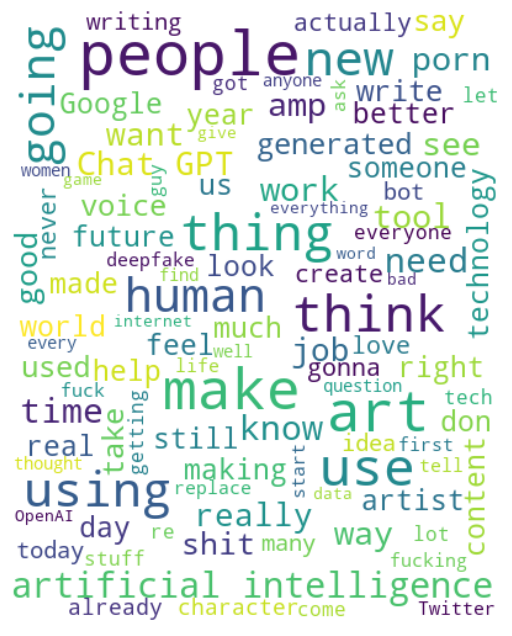

In [163]:
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [164]:
wc.words_.keys()

dict_keys(['people', 'art', 'make', 'use', 'think', 'thing', 'using', 'new', 'human', 'going', 'artificial intelligence', 'know', 'need', 'time', 'work', 'porn', 'see', 'amp', 'tool', 'way', 'want', 'really', 'job', 'Chat GPT', 'shit', 'good', 'take', 'say', 'generated', 'write', 'used', 'voice', 'world', 'someone', 'made', 'artist', 'feel', 'us', 'day', 'year', 'right', 'Google', 'making', 'future', 'look', 'content', 'much', 'still', 'real', 'don', 'technology', 'help', 'better', 'actually', 'never', 'gonna', 'love', 'create', 'writing', 'bot', 'many', 'today', 'idea', 'already', 'character', 'everyone', 'tech', 'getting', 'got', 'come', 'let', 'lot', 'stuff', 're', 'deepfake', 'fucking', 'guy', 'fuck', 'Twitter', 'start', 'first', 'replace', 'life', 'ask', 'tell', 'question', 'anyone', 'thought', 'every', 'find', 'women', 'well', 'everything', 'give', 'data', 'internet', 'game', 'OpenAI', 'word', 'bad'])

In [109]:
to_remove = all_data.Text.str.contains('PREMIUM ACCOUNT!')
all_data.drop(all_data[to_remove].index, inplace=True)

In [118]:
all_data.index = range(0, len(all_data))

In [119]:
all_data

,Text,Date
0,i don't think the creator actually knew how to...,2023-01-19 17:59:24+00:00
1,chatgpt!?,2023-01-19 17:59:18+00:00
2,That was never a pen lol ai man,2023-01-19 17:59:18+00:00
3,these ai history things make me laugh so fucki...,2023-01-19 17:59:10+00:00
4,Microsoft used to be best employer and a dream...,2023-01-19 17:58:30+00:00
...,...,...
14271,It is great to see the crypto community so ent...,2023-02-02 05:05:03+00:00
14272,Let's share stories that makes no sense in the...,2023-02-02 05:05:02+00:00
14273,AI EP dropping next week,2023-02-02 05:05:01+00:00
14274,"AI generated porn, huh?? Hold my beer.",2023-02-02 05:04:58+00:00


In [165]:
text_to_tokenize = text.replace('\n', ' ')
words = nltk.tokenize.word_tokenize(text_to_tokenize)

In [166]:
words.sort()

In [402]:
words

['!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!'

In [260]:
len(words) 

230843

In [167]:
def unique_words(words):
    unique = []
    last = ''
    for word in words:
        actual = word
        if actual != last:
            unique.append(actual)
            last = actual
        else:
            last = actual
    return unique

In [168]:
def count_words(unique, words):
    count = []
    for word in unique:
        n = words.count(word)
        count.append(n)
        
    return count

In [169]:
unique = unique_words(words)
unique

['!',
 '#',
 '$',
 '%',
 '&',
 "'",
 "''",
 "'22",
 "'23",
 "'76",
 "'AI",
 "'Ai",
 "'Apprentice",
 "'Art",
 "'Artzi",
 "'BING",
 "'Big",
 "'Borg",
 "'CHAT",
 "'Cause",
 "'Chat",
 "'Chatgpt",
 "'Claude",
 "'Commit",
 "'D",
 "'Do",
 "'Feinberg",
 "'Frenching",
 "'Green",
 "'Health-related",
 "'How",
 "'LL",
 "'M",
 "'Made",
 "'Make",
 "'Microsoft",
 "'Most",
 "'Mother",
 "'Next",
 "'Please",
 "'Poster",
 "'Pro-shippers",
 "'RE",
 "'Rejected",
 "'S",
 "'Sparrow",
 "'Thank",
 "'Tomorrow",
 "'Traditional",
 "'Turing",
 "'Unreliable",
 "'VE",
 "'What",
 "'YES",
 "'Yes",
 "'You",
 "'ai",
 "'arms-race",
 "'art",
 "'artificial",
 "'artist",
 "'basic",
 "'bias",
 "'bits",
 "'black",
 "'bonded",
 "'brain",
 "'caricature",
 "'cause",
 "'certainty",
 "'chat",
 "'closely",
 "'code",
 "'cos",
 "'d",
 "'detonators",
 "'discourse",
 "'discussion",
 "'em",
 "'entitled",
 "'for",
 "'get",
 "'hack",
 "'happiness",
 "'here",
 "'imperfect",
 "'intelligent",
 "'intranet",
 "'leader",
 "'less",
 "'likeness",

In [170]:
count = count_words(unique, words)

In [293]:
count

[958,
 39,
 863,
 249,
 407,
 122,
 664,
 1,
 6,
 1,
 3,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 8,
 1,
 1,
 1,
 1,
 3,
 2,
 10,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 51,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 119,
 329,
 1,
 1,
 1,
 1,
 1,
 1,
 171,
 1,
 1,
 1189,
 1,
 1,
 1,
 1,
 1,
 1,
 144,
 2,
 1,
 601,
 684,
 252,
 114,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 5118,
 410,
 28,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 5,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 7293,
 145,
 417,
 43,
 9,
 2,
 3,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 55,
 10,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1

In [171]:
df_words = pd.DataFrame([unique, count]).T
df_words.columns = ['Word', 'Count']

In [394]:
df_words.sort_values(by='Count', ascending=False).head(10).values

array([['I', 3273, False, True],
       ['ai', 1355, False, True],
       ['s', 738, False, True],
       ['people', 725, False, True],
       ['The', 618, False, True],
       ['art', 603, False, True],
       ['t', 535, False, True],
       ['porn', 510, False, True],
       ['make', 504, False, True],
       ['It', 467, False, True]], dtype=object)

In [172]:
df_words['Useless_Word'] = df_words['Word'].apply(lambda x: True if x in stopwords else False)
df_words['To_Keep'] = df_words.Word.str.isalpha()
df_words = df_words[(df_words.To_Keep == True) & (df_words.Useless_Word == False)]

In [533]:
df_words.sort_values(by='Count', ascending=False).head(250)

,Word,Count,Useless_Word,To_Keep
16890,people,725,False,True
8462,art,603,False,True
17241,porn,510,False,True
15285,make,504,False,True
20459,think,454,False,True
...,...,...,...,...
21556,wan,63,False,True
19874,students,63,False,True
14788,language,63,False,True
15377,market,62,False,True


In [173]:
top_250_words = df_words.sort_values(by='Count', ascending=False).head(250)[['Word', 'Count']]

In [180]:
top_250_words

,Word,Count
24311,people,1193
12792,art,985
22079,make,846
30142,use,786
29101,think,746
...,...,...
25525,questions,110
2187,All,110
7008,Like,109
20160,image,109


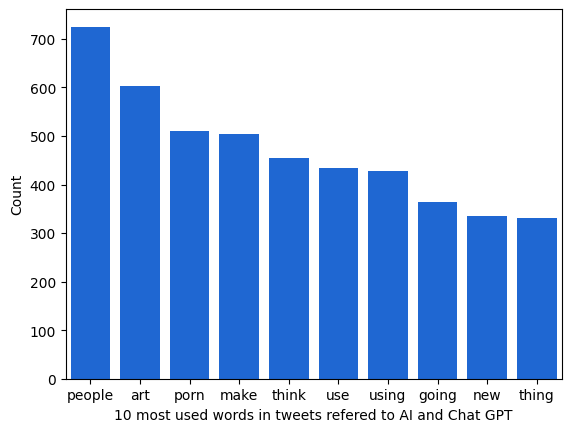

In [177]:
ax = sns.barplot(data=old_250_words.head(10), x='Word', y='Count', orient='vertical', color='#0161F0')
ax.set_xlabel('10 most used words in tweets refered to AI and Chat GPT')
plt.show()

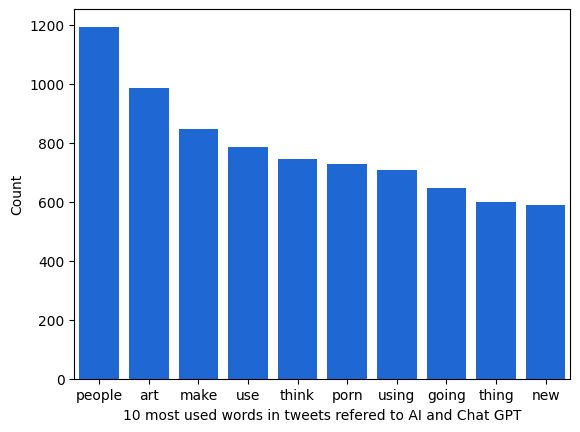

In [178]:
ax = sns.barplot(data=top_250_words.head(10), x='Word', y='Count', orient='vertical', color='#0161F0')
ax.set_xlabel('10 most used words in tweets refered to AI and Chat GPT')
plt.show()

In [184]:
storage_clean_data(results_df)
storage_words(top_250_words)

In [185]:
results_df = pd.read_csv(clean_filename)
top_250_words = pd.read_csv(words_filename)

In [43]:
#Create a model that predict if a tweet is Positive, Negative or Neutral.

In [186]:
results_df.groupby('Sentiment').size()

Sentiment
0    4775
1    3391
2    6110
dtype: int64

In [28]:
results_df.head().iloc[:,2:]

,roberta_neg,roberta_neu,roberta_pos,Sentiment
0,0.760317,0.224270,0.015413,2
1,0.163392,0.775572,0.061036,0
2,0.159326,0.671840,0.168835,0
3,0.029020,0.071892,0.899088,1
4,0.342933,0.429579,0.227488,2


In [30]:
results_df.iloc[:,2:].describe()

,roberta_neg,roberta_neu,roberta_pos,Sentiment
count,8244.000000,8244.000000,8244.000000,8244.000000
mean,0.379587,0.383590,0.236823,1.098981
std,0.347224,0.257539,0.297044,0.872096
min,0.000766,0.005045,0.001826,0.000000
25%,0.038022,0.147593,0.022722,0.000000
50%,0.284702,0.364112,0.084401,1.000000
75%,0.711999,0.580350,0.362691,2.000000
max,0.983777,0.938086,0.993255,2.000000


In [31]:
classification_df = results_df.iloc[:,2:]

C:\Users\tonch\AppData\Local\Temp\ipykernel_76760\778576068.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  classification_df.hist(ax=ax)


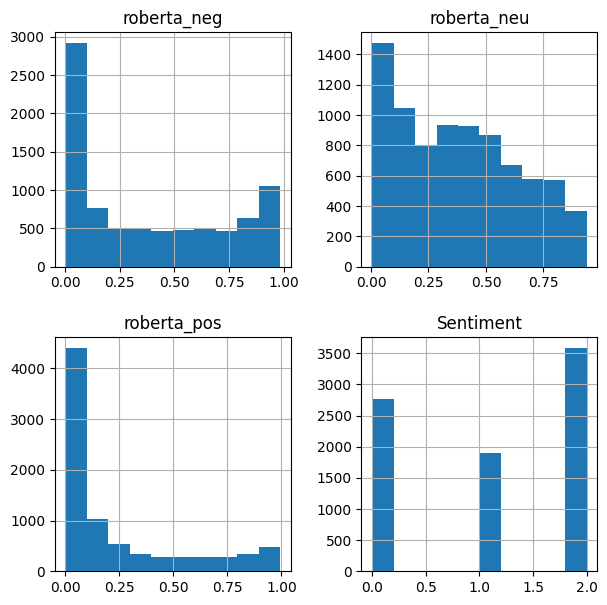

In [42]:
fig = plt.figure(figsize=(7,7))
ax = fig.gca()
classification_df.hist(ax=ax)
plt.show()

In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [64]:
array = classification_df.values
x = array[:,0:3]
y = array[:,3:]
test_size = 0.2
seed = 7

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

In [66]:
models = []
models.append(('LoR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('k-NN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train.ravel(), cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    
    print(f'{name}:{cv_results.mean()*100.0:,.2f}% ({cv_results.std()*100.0:,.2f}%)')

LoR:97.82% (0.50%)
LDA:95.04% (0.64%)
k-NN:99.58% (0.19%)
CART:99.89% (0.12%)
NB:93.90% (0.86%)
SVM:99.45% (0.28%)


In [133]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

1.0
[[536   0   0]
 [  0 367   0]
 [  0   0 746]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       536
         1.0       1.00      1.00      1.00       367
         2.0       1.00      1.00      1.00       746

    accuracy                           1.00      1649
   macro avg       1.00      1.00      1.00      1649
weighted avg       1.00      1.00      1.00      1649



In [126]:
len(x)

8244

In [129]:
df_to_classify = results_df.loc[8244:]
df_to_classify

,Text,Date,roberta_neg,roberta_neu,roberta_pos
8244,And copies mimics my red flags then preaches m...,2023-02-02 19:38:48+00:00,0.795145,0.191752,0.013102
8245,When someone’s gives birth to one of these AI ...,2023-02-02 19:38:47+00:00,0.835101,0.148003,0.016896
8246,$BDP looking like an easy 50x in the next 30 d...,2023-02-02 19:38:46+00:00,0.001337,0.067692,0.930971
8247,Can chatgpt write my shot list?? 👀,2023-02-02 19:38:37+00:00,0.046725,0.891688,0.061587
8248,Chat GPT is one of the biggest jokes in AI his...,2023-02-02 19:38:34+00:00,0.936448,0.055449,0.008103
...,...,...,...,...,...
14271,It is great to see the crypto community so ent...,2023-02-02 05:05:03+00:00,0.001371,0.016942,0.981687
14272,Let's share stories that makes no sense in the...,2023-02-02 05:05:02+00:00,0.754192,0.228544,0.017263
14273,AI EP dropping next week,2023-02-02 05:05:01+00:00,0.005247,0.905054,0.089699
14274,"AI generated porn, huh?? Hold my beer.",2023-02-02 05:04:58+00:00,0.741837,0.233243,0.024921


In [140]:
new_x = df_to_classify.iloc[:,2:].values

In [141]:
new_x

array([[0.7951454 , 0.19175239, 0.01310229],
       [0.835101  , 0.14800347, 0.01689557],
       [0.00133711, 0.0676919 , 0.93097097],
       ...,
       [0.00524678, 0.90505403, 0.08969922],
       [0.7418366 , 0.23324254, 0.02492084],
       [0.00979643, 0.3108256 , 0.67937803]], dtype=float32)

In [142]:
new_y = model.predict(new_x)

In [143]:
new_y

array([2., 2., 1., ..., 0., 2., 1.])

In [144]:
df_to_compare = df_to_classify.copy()

In [145]:
df_to_compare['Sentiment'] = new_y

In [146]:
df_to_compare

,Text,Date,roberta_neg,roberta_neu,roberta_pos,Sentiment
8244,And copies mimics my red flags then preaches m...,2023-02-02 19:38:48+00:00,0.795145,0.191752,0.013102,2.0
8245,When someone’s gives birth to one of these AI ...,2023-02-02 19:38:47+00:00,0.835101,0.148003,0.016896,2.0
8246,$BDP looking like an easy 50x in the next 30 d...,2023-02-02 19:38:46+00:00,0.001337,0.067692,0.930971,1.0
8247,Can chatgpt write my shot list?? 👀,2023-02-02 19:38:37+00:00,0.046725,0.891688,0.061587,0.0
8248,Chat GPT is one of the biggest jokes in AI his...,2023-02-02 19:38:34+00:00,0.936448,0.055449,0.008103,2.0
...,...,...,...,...,...,...
14271,It is great to see the crypto community so ent...,2023-02-02 05:05:03+00:00,0.001371,0.016942,0.981687,1.0
14272,Let's share stories that makes no sense in the...,2023-02-02 05:05:02+00:00,0.754192,0.228544,0.017263,2.0
14273,AI EP dropping next week,2023-02-02 05:05:01+00:00,0.005247,0.905054,0.089699,0.0
14274,"AI generated porn, huh?? Hold my beer.",2023-02-02 05:04:58+00:00,0.741837,0.233243,0.024921,2.0


In [155]:
results_df[8244:]

,Text,Date,roberta_neg,roberta_neu,roberta_pos,Sentiment
8244,And copies mimics my red flags then preaches m...,2023-02-02 19:38:48+00:00,0.795145,0.191752,0.013102,2
8245,When someone’s gives birth to one of these AI ...,2023-02-02 19:38:47+00:00,0.835101,0.148003,0.016896,2
8246,$BDP looking like an easy 50x in the next 30 d...,2023-02-02 19:38:46+00:00,0.001337,0.067692,0.930971,1
8247,Can chatgpt write my shot list?? 👀,2023-02-02 19:38:37+00:00,0.046725,0.891688,0.061587,0
8248,Chat GPT is one of the biggest jokes in AI his...,2023-02-02 19:38:34+00:00,0.936448,0.055449,0.008103,2
...,...,...,...,...,...,...
14271,It is great to see the crypto community so ent...,2023-02-02 05:05:03+00:00,0.001371,0.016942,0.981687,1
14272,Let's share stories that makes no sense in the...,2023-02-02 05:05:02+00:00,0.754192,0.228544,0.017263,2
14273,AI EP dropping next week,2023-02-02 05:05:01+00:00,0.005247,0.905054,0.089699,0
14274,"AI generated porn, huh?? Hold my beer.",2023-02-02 05:04:58+00:00,0.741837,0.233243,0.024921,2


In [158]:
real_y = results_df.iloc[8244:,5:].values

In [159]:
real_y

array([[2],
       [2],
       [1],
       ...,
       [0],
       [2],
       [1]], dtype=int64)

In [160]:
print(classification_report(real_y, new_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2008
           1       0.99      1.00      1.00      1497
           2       1.00      1.00      1.00      2527

    accuracy                           1.00      6032
   macro avg       1.00      1.00      1.00      6032
weighted avg       1.00      1.00      1.00      6032

